<a href="https://colab.research.google.com/github/ivvnn/LE1_Hernandez_IJ/blob/main/LE1_Hernandez_IJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
data = pd.read_csv('/content/sample_data/liver.csv')
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  345 non-null    int64  
 1   mcv         345 non-null    int64  
 2   alkphos     345 non-null    int64  
 3   sgpt        345 non-null    int64  
 4   sgot        345 non-null    int64  
 5   gammagt     345 non-null    int64  
 6   drinks      345 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 19.0 KB


(345, 7)

In [88]:
data.head()

,Unnamed: 0,mcv,alkphos,sgpt,sgot,gammagt,drinks
0,0,85,92,45,27,31,0.0
1,1,85,64,59,32,23,0.0
2,2,86,54,33,16,54,0.0
3,3,91,78,34,24,36,0.0
4,4,87,70,12,28,10,0.0


In [89]:
#check for missing and duplicate values
data = pd.read_csv('/content/sample_data/liver.csv')

data.head()

print('Missing values:')
print(data.isnull().sum())

duplicate_rows = data[data.duplicated()]
if duplicate_rows.shape[0] == 0:
  print('No duplicates found')
else:
  print('Duplicates found')
  print(duplicate_rows)

Missing values:
Unnamed: 0    0
mcv           0
alkphos       0
sgpt          0
sgot          0
gammagt       0
drinks        0
dtype: int64
No duplicates found


In [90]:
#check for highest correlation
correlation_mcv = data['mcv'].corr(data['drinks'])
correlation_alkphos = data['alkphos'].corr(data['drinks'])
correlation_sgpt = data['sgpt'].corr(data['drinks'])
correlation_sgot = data['sgot'].corr(data['drinks'])
correlation_gammagt = data['gammagt'].corr(data['drinks'])

print("mcv: ", correlation_mcv)
print("alkphos: ", correlation_alkphos)
print("sgpt: ", correlation_sgpt)
print("sgot: ", correlation_sgot)
print("gammagt: ", correlation_gammagt)

mcv:  0.3126795966511216
alkphos:  0.10079605839698672
sgpt:  0.20684793492452236
sgot:  0.2795877736826017
gammagt:  0.3412239586693898


In [144]:
fig = px.box(data['gammagt'], points = 'all')
fig.update_layout(title = f'Distribution of X',title_x=0.5, yaxis_title= "gammagt")
fig.show()

fig = px.box(data['drinks'], points = 'all')
fig.update_layout(title = f'Distribution of Y',title_x=0.5, yaxis_title= "drinks")
fig.show()

In [145]:
fig = px.box(data['mcv'], points = 'all')
fig.update_layout(title = f'Distribution of X',title_x=0.5, yaxis_title= "mcv")
fig.show()

fig = px.box(data['drinks'], points = 'all')
fig.update_layout(title = f'Distribution of Y',title_x=0.5, yaxis_title= "drinks")
fig.show()

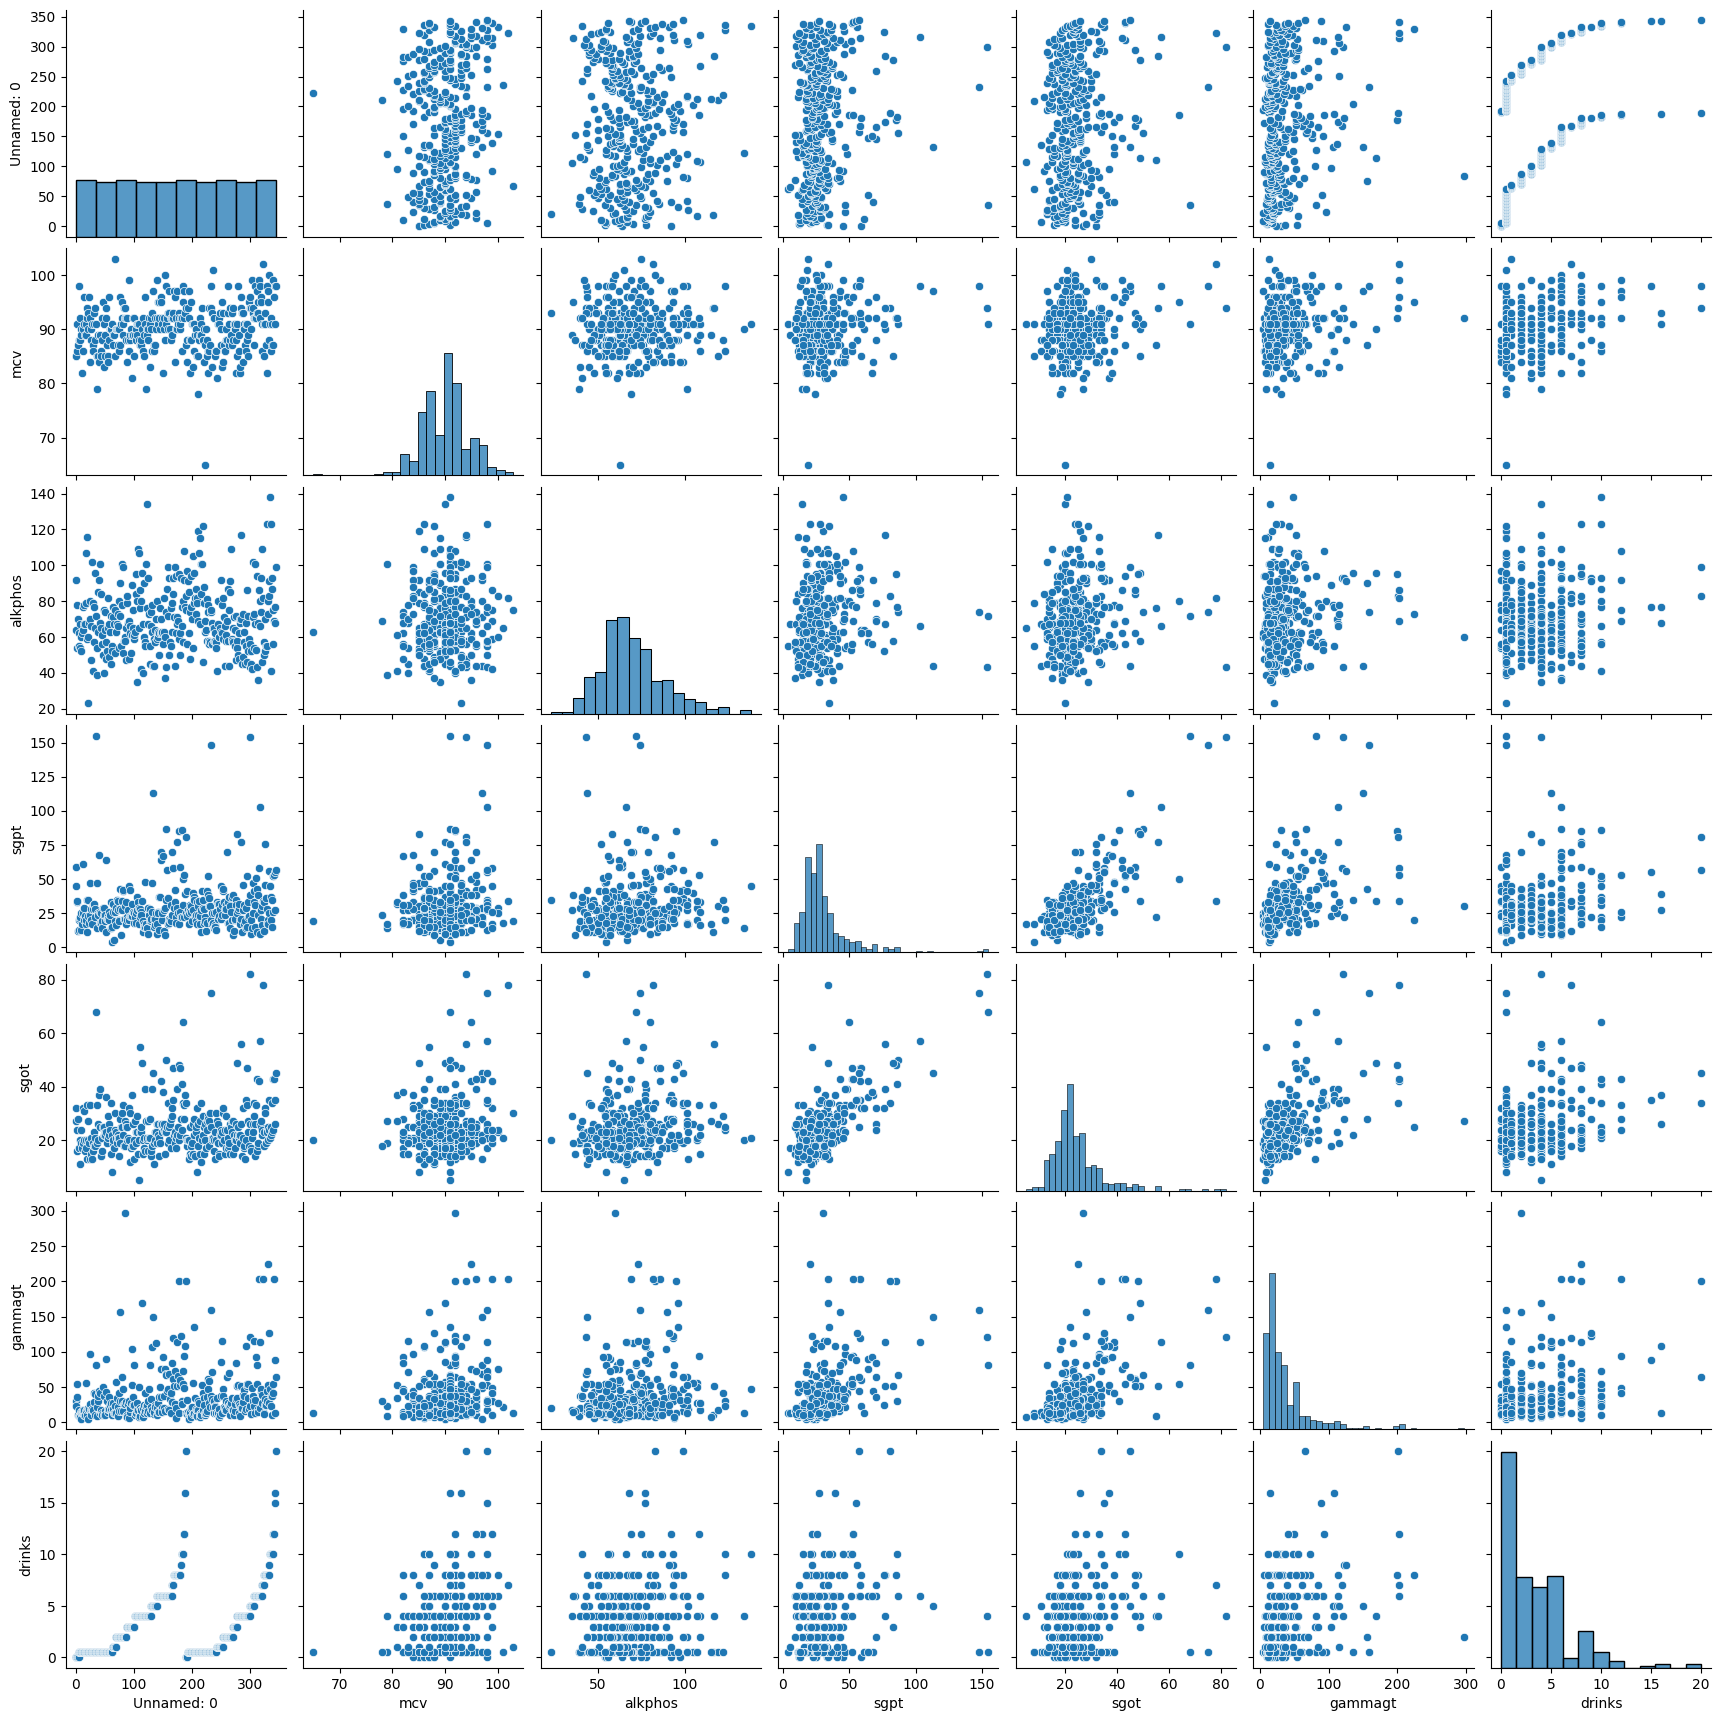

In [146]:
sns.pairplot(data)

In [130]:
#combining two features into one
X_combined = data[['gammagt', 'mcv']].values

print(X_combined.shape)
y = data['drinks']

(345, 2)


In [132]:
#data split
X_combined = data[['gammagt', 'mcv']].values
y = data['drinks']

X_combined_train,X_combined_test,y_train,y_test = train_test_split(X_combined,y,test_size=0.2,random_state=42)

print(X_combined_train.shape)
print(X_combined_test.shape)
print(y_train.shape)
print(y_test.shape)

(276, 2)
(69, 2)
(276,)
(69,)


In [153]:
#evaluation metrics
X_combined = data[['gammagt', 'mcv']].values
y = data[['drinks']]

X_combined_train,X_combined_test,y_train,y_test = train_test_split(X_combined,y,test_size=0.2,random_state=42)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_combined_train)
X_test_poly = poly.transform(X_combined_test)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_poly = model_poly.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred_poly)
mae = mean_absolute_error(y_test, y_pred_poly)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_poly)

print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)
print("R2: ", r2)

MSE:  9.462208568179962
MAE:  2.535939241553188
RMSE:  3.0760703126196516
R2:  0.11108880330104265


In [141]:
#calculate the mean and variance
mean_x = np.mean(X_combined[:, 0])
mean_y = np.mean(data['drinks'])

var_x = np.var(X_combined[:, 0])
var_y = np.var(data['drinks'])


print('combined features stats: mean= %.3f   variance= %.3f' % (mean_x, var_x))
print('target stats: mean= %.3f   variance= %.3f' % (mean_y, var_y))

#calculate covariance between x and y
def covariance(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar/len(x)

covar_xy = covariance(X_combined[:, 0], y)
print(f'Cov(X,Y): {covar_xy}')

#estimate coefficients
b1 = covar_xy / var_x
b0 = mean_y - b1 * mean_x

print(f'Coefficents: b0: {b0}  b1: {b1} ')

combined features stats: mean= 38.284   variance= 1536.458
target stats: mean= 3.455   variance= 11.109
Cov(X,Y): 44.57942869145139
Coefficents: b0: 2.3442832707537367  b1: 0.029014405783613022 


In [142]:
#predicting the target variable using estimated coefficients
x_combined = X_combined[:, 0]
print(f'x: {x_combined}')

y_hat = b0 + b1 * x_combined
print(f'\n\ny_hat: {y_hat}')

y = data['drinks'].values
print(f'\n\ny: {y}')

x: [ 31  23  54  36  10  17   9  11   7   5  15  15  13  18  11  18  10  16
  56  11  19  20   5  19  97  26  18  10  19  16  17  42  29  40  11  82
  22   9  30  38  44  42  13  16  18  13  10  50  11  38  16  11  90  43
  30  15  19  19  36  24  27  18  13  11  27  19  14  23  13  14  57  35
   9  22  16  42 156  30  16  30  64  48  16  26 297  26  29   9  11   7
  26   6  30  15  20  27  53 104  36  24  25  81  10  13  14  17  27  18
   7  50   9  21  17  17 169   8  21  14  25  16  42  23  14  24  31  16
  48  82  13  22  33  18 107 150  12  15  24  22 112  11  20  28  15  36
  15  50  36  76  20  15  92  37  21  16  76  69  67  44  48  19  68  17
  33  41  14  29  84 120  62  52  26  73  21   6 114  52  66  14 200  53
  60 123  31  26  73  55  94  49 108 201  14  12  32  15   5  12  12  15
  21   8  22  12  56  14 135  35  11  19  18   9  17  31  27   7  12  14
  10  53  18  42  35  24  11  14  14  16  36  62  48  59  27  22 159  38
  71  33  22  31  13  23  22  13  13  34  13  14

In [143]:
#visual rep
fig = go.Figure()

fig.add_trace(go.Scatter(x=x_combined, y=data['drinks'], name='actual', mode='markers', marker_color='blue'))
fig.add_trace(go.Scatter(x=x_combined, y=y_hat, name='prediction', mode='lines+markers', marker_color='red'))

fig.update_layout(title = f'Liver Disorder',title_x=0.5, xaxis_title= "combined features", yaxis_title="drinks")
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()